In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from scipy import stats
from scipy.stats import norm
import seaborn as sns


In [4]:
data = pd.read_csv('50_startups.csv')

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Data cleaning

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [15]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [18]:
data = data.rename({'R&D Spend':'rd_spend','Marketing Spend':'mark_spend'},axis=1)
data

,rd_spend,Administration,mark_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [26]:
data = data.drop(['State'],axis=1)

In [27]:
#checking for NA values
data.isna().sum()

rd_spend          0
Administration    0
mark_spend        0
Profit            0
dtype: int64

# Correlation analysis

In [28]:
data.corr()

,rd_spend,Administration,mark_spend,Profit
rd_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
mark_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [29]:
data.describe()

,rd_spend,Administration,mark_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# EDA and data visualization

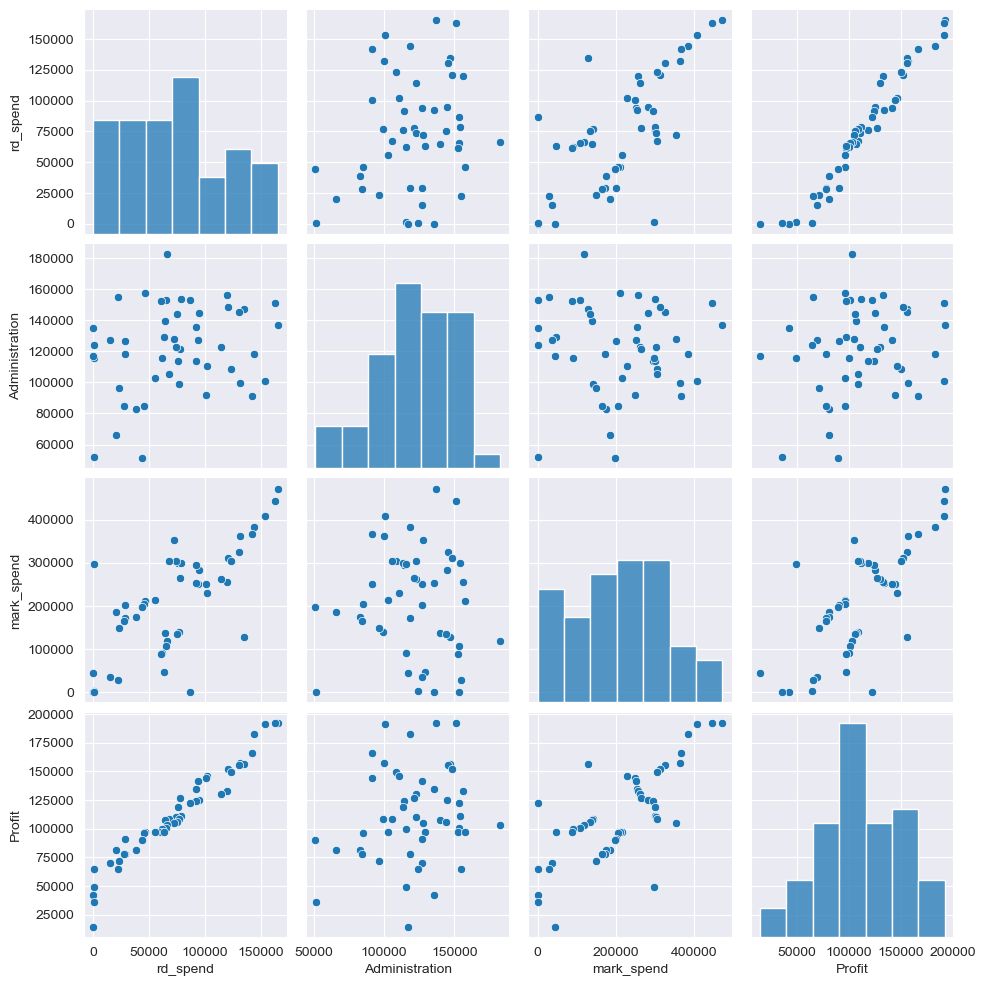

In [30]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Building a model

In [31]:
#Fitting a regression model

import statsmodels.formula.api as smf

model = smf.ols('Profit~rd_spend+Administration+mark_spend',data=data).fit()

# Model testing

In [32]:
#Extracting the coefficients

model.params

Intercept         50122.192990
rd_spend              0.805715
Administration       -0.026816
mark_spend            0.027228
dtype: float64

In [36]:
model.tvalues,model.pvalues

(Intercept          7.626218
 rd_spend          17.846374
 Administration    -0.525507
 mark_spend         1.655077
 dtype: float64,
 Intercept         1.057379e-09
 rd_spend          2.634968e-22
 Administration    6.017551e-01
 mark_spend        1.047168e-01
 dtype: float64)

In [37]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [38]:
#Build SLR and MLR models for in-significant values Administration and mark_spend(Values of this variables are greater than 0.05)
#Also find their t and p values

In [39]:
model_a = smf.ols('Profit~Administration',data=data).fit()

In [40]:
model_a.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [42]:
model_a.tvalues,model_a.pvalues


(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [43]:
#p-value(0.16) is greater than 0.05. Hence, Administration is the insignifacnt variable.

In [44]:
model_m = smf.ols('Profit~mark_spend',data=data).fit()

In [45]:
 model_m.tvalues,model_m.pvalues

(Intercept     7.808356
 mark_spend    7.802657
 dtype: float64,
 Intercept     4.294735e-10
 mark_spend    4.381073e-10
 dtype: float64)

In [46]:
#p-value is less than 0.05. Hence, mark_spend is the significant variable.

# Model validation

Two techniques: 1.Collinearity check & 2.Residual analysis

In [48]:
#Collinearity problem check
#Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r = smf.ols('rd_spend~Administration+mark_spend',data=data).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Administration~rd_spend+mark_spend',data=data).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('mark_spend~Administration+rd_spend',data=data).fit().rsquared
vif_m = 1/(1-rsq_m)

#Putting values in DataFrame format

d1={'Variables':['rd_spend','mark_spend','Administration'],'Vif':[vif_r,vif_a,vif_m]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,Vif
0,rd_spend,2.468903
1,mark_spend,1.175091
2,Administration,2.326773


In [49]:
#None variable has VIF>20, No collinearity, so consider all variables in regression equation.

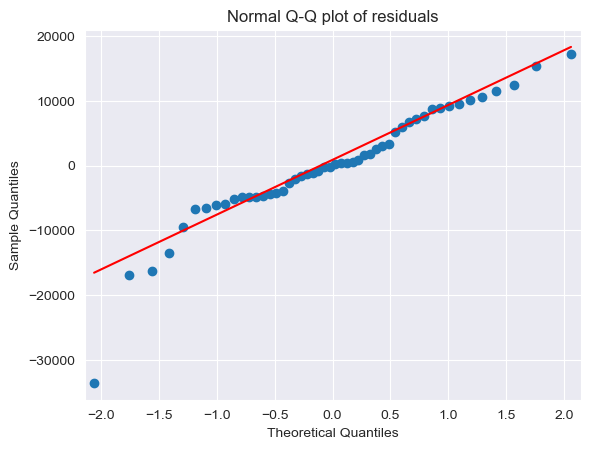

In [51]:
#Residual analysis
#Test for normality of residuals(Q-Q plot) using residual model

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [53]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [54]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model)

def standard_values(vals) : return (vals-vals.mean())/vals.std()

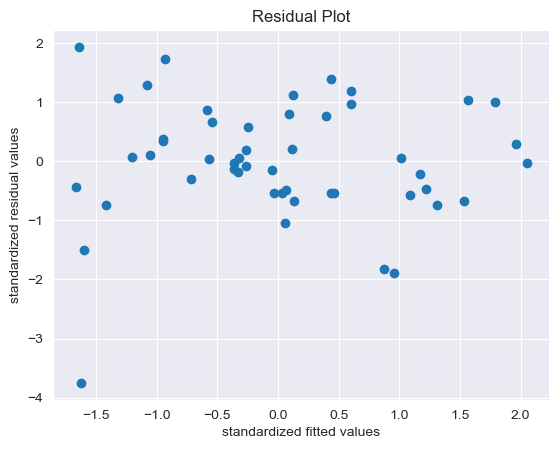

In [55]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()


In [56]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable


eval_env: 1


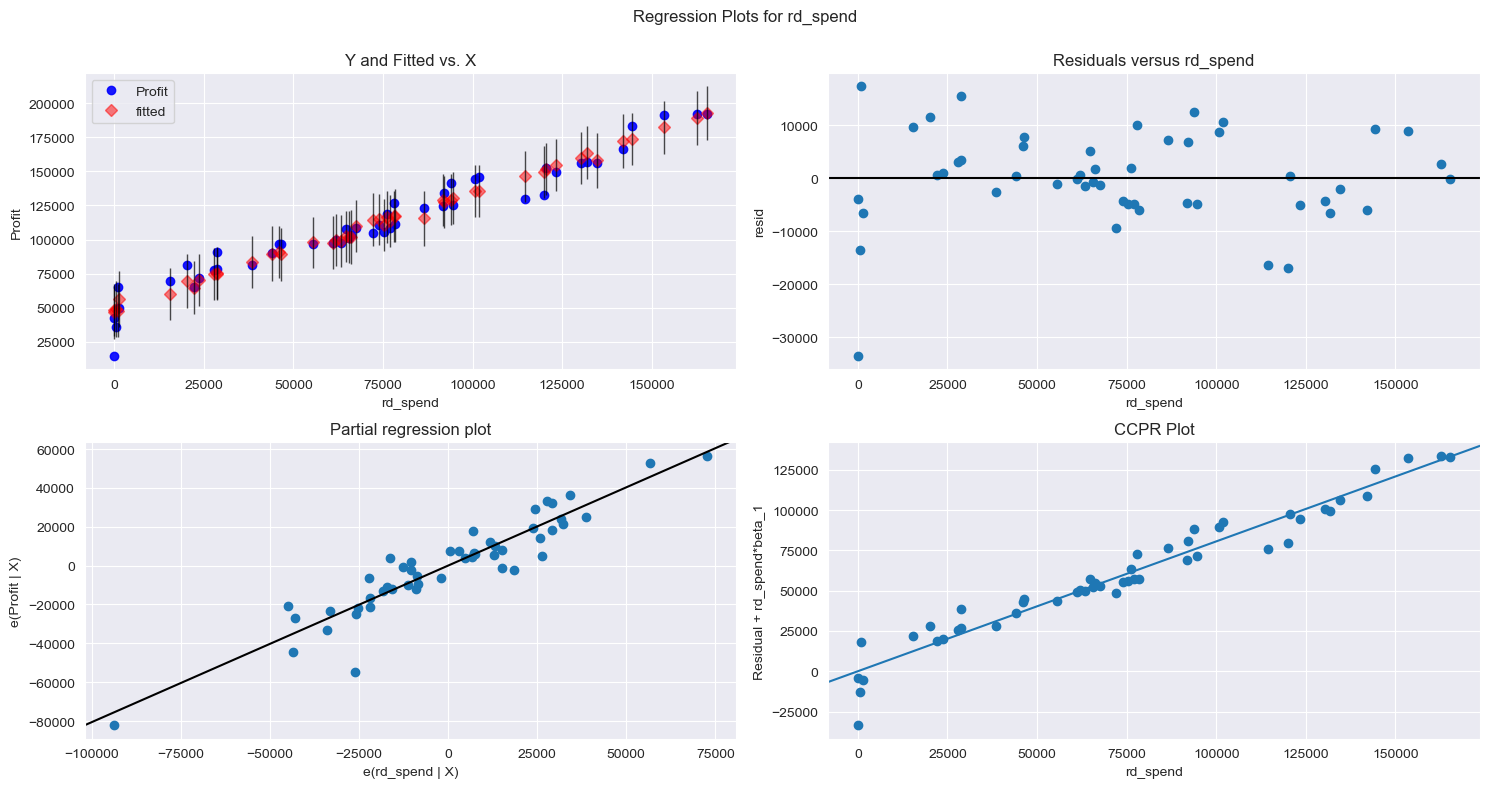

In [58]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'rd_spend',fig=fig)
plt.show()

eval_env: 1


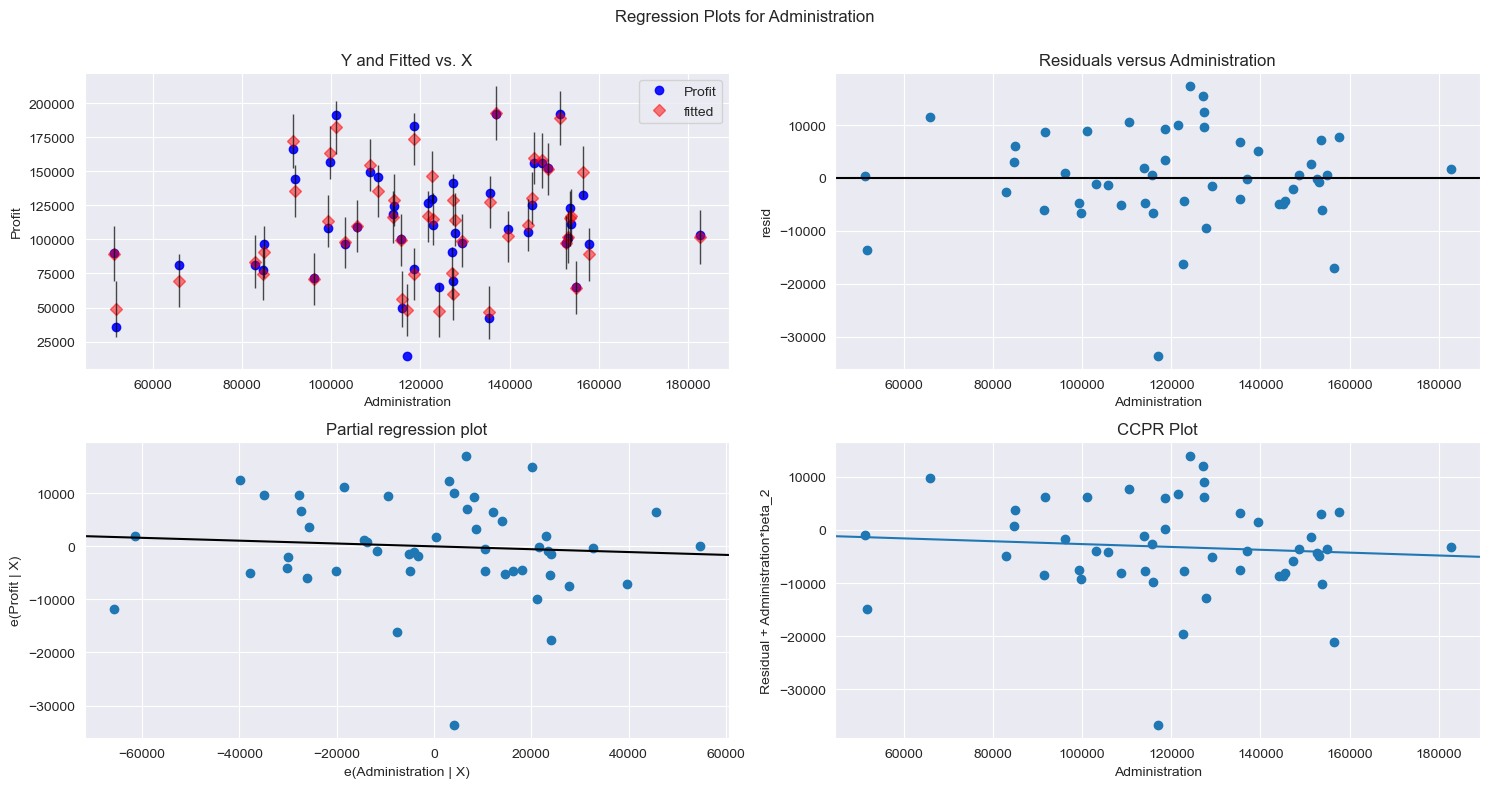

In [59]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

In [60]:
data.tail()

,rd_spend,Administration,mark_spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


eval_env: 1


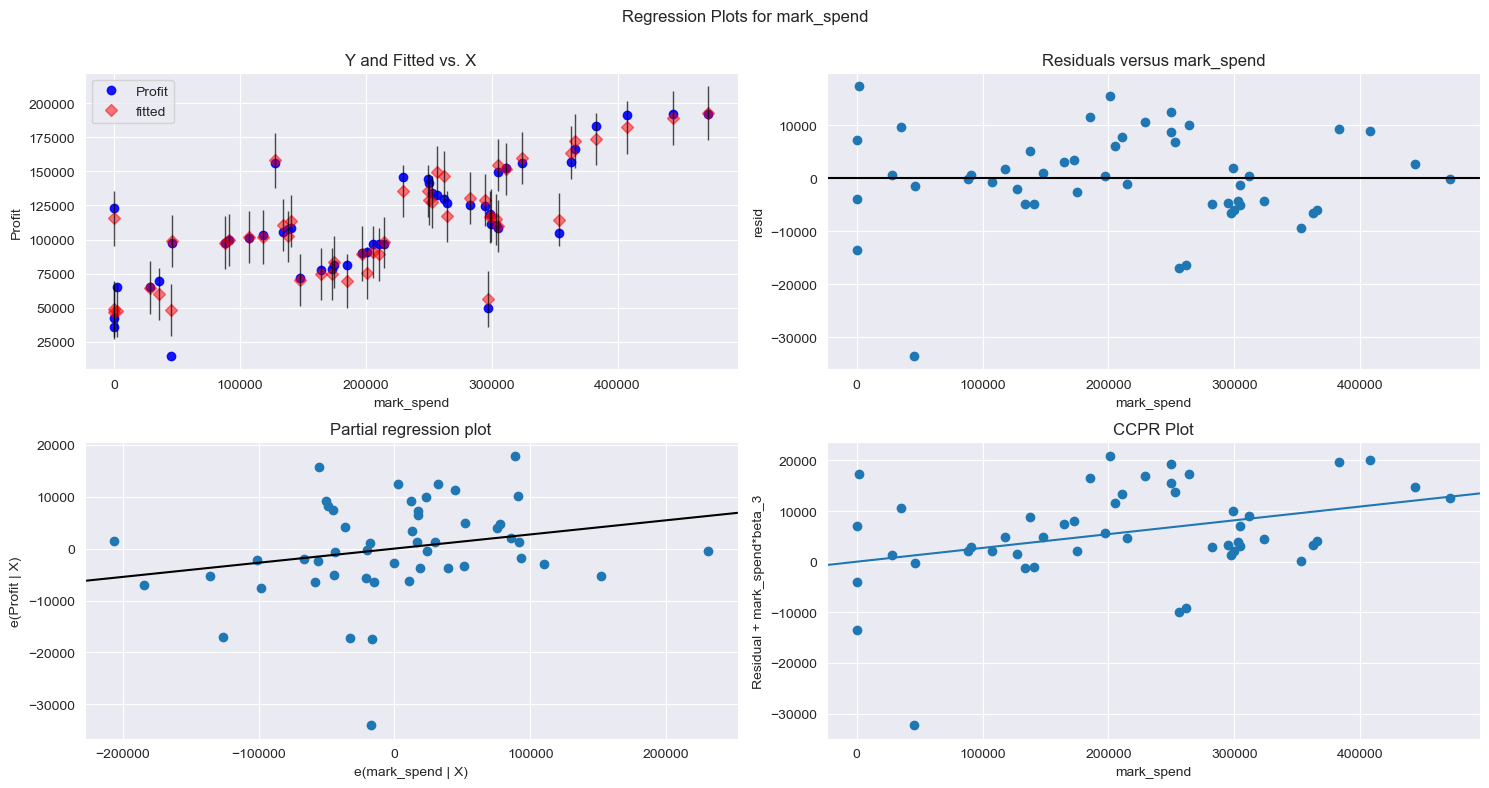

In [61]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'mark_spend',fig=fig)
plt.show()

# Model deletion diagonstics (checking outliers or influencers)
Two techniques 1.Cook's distance & 2.Leverage value

In [62]:
#Cook's distance: if cook's distance > 1 , then it's an outlier
#Get influencers using cook's distance

(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'Cooks distance')

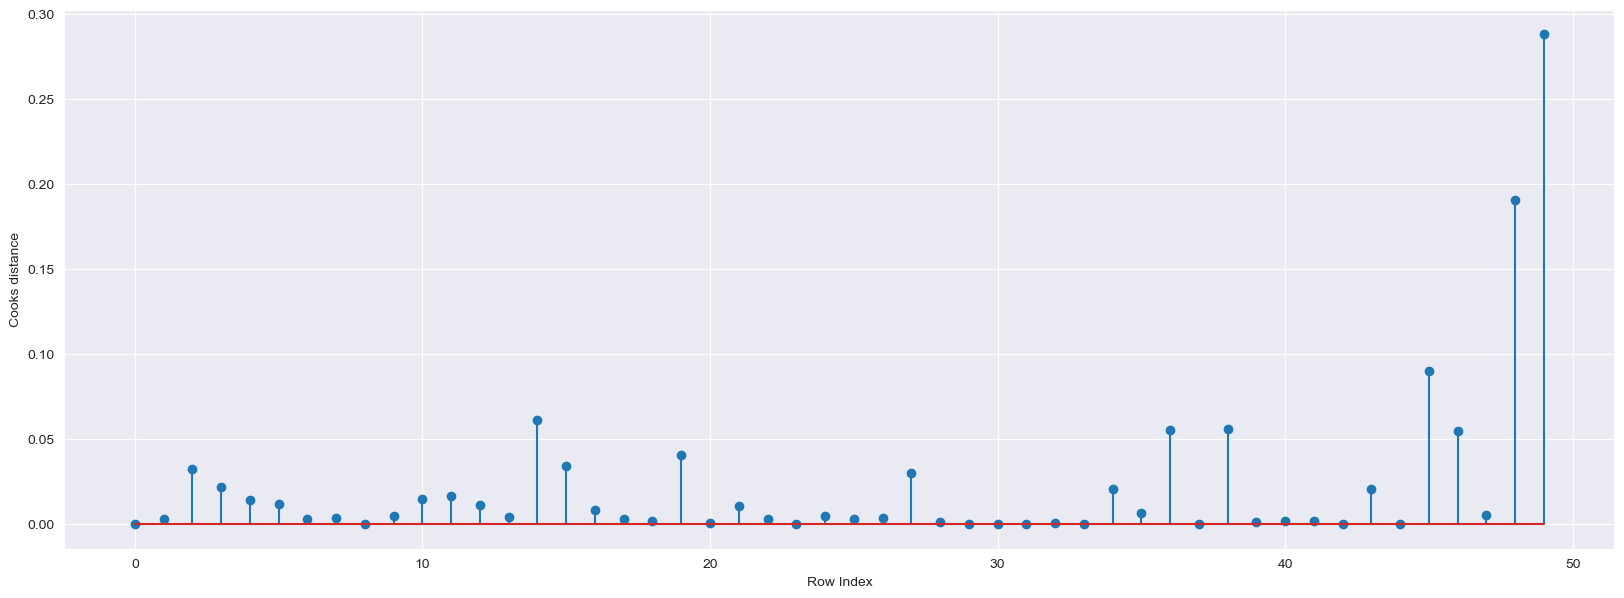

In [63]:
#Plot the influencers using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')

In [64]:
#Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

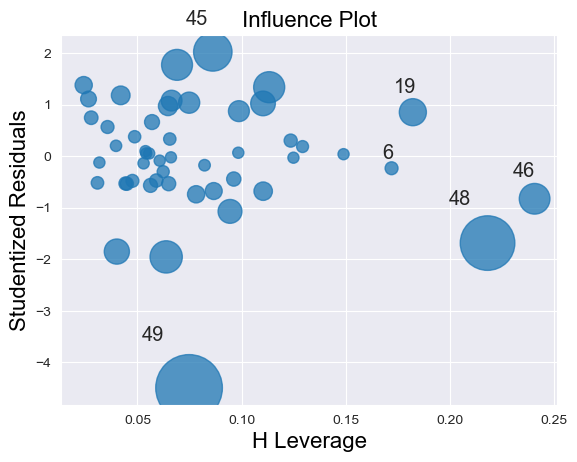

In [65]:
#Leverage value using high influence points:  points beyond leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [67]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [68]:
data[data.index.isin([49])] 

,rd_spend,Administration,mark_spend,Profit
49,0.0,116983.8,45173.06,14681.4


# Improving the model

In [69]:
#Discard the data points which are influencers and reassign the row number(reset_index(drop=True))
data_new = data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data_new

,rd_spend,Administration,mark_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Model deletion diagonstics and final model

In [70]:
model_new = smf.ols('Profit~rd_spend+Administration+mark_spend',data=data_new).fit()

In [71]:
while model_new.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model_new = smf.ols('Profit~rd_spend+Administration+mark_spend',data=data_new).fit()
        (c,_)=model_new.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data_new=data_new.drop(data_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data_new
    else:
        final_model=smf.ols('Profit~rd_spend+Administration+mark_spend',data=data_new).fit()
        final_model.rsquared , final_model.aic
        print('Model accuracy is improved to',final_model.rsquared)

Model accuracy is improved to 0.9626766170294073
Model accuracy is improved to 0.9614129113440602
Model accuracy is improved to 0.962593650298269
Model accuracy is improved to 0.9638487279209413
Model accuracy is improved to 0.9663901957918793
Model accuracy is improved to 0.9706076169779906
Model accuracy is improved to 0.9727840588916423
Model accuracy is improved to 0.9734292907181952
Model accuracy is improved to 0.9785801571833451
Model accuracy is improved to 0.9777383743090915
Model accuracy is improved to 0.9790510088977512
Model accuracy is improved to 0.9790004461890552
Model accuracy is improved to 0.9807878666153609
Model accuracy is improved to 0.9838299343609735
Model accuracy is improved to 0.983114992639277
Model accuracy is improved to 0.9833768520972176
Model accuracy is improved to 0.9878892536376698
Model accuracy is improved to 0.98771919355472
Model accuracy is improved to 0.9858356627471713
Model accuracy is improved to 0.9874766829880098
Model accuracy is improv

In [72]:
final_model.rsquared

0.9882757054424702

In [73]:
data_new.head()

,rd_spend,Administration,mark_spend,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96


# Model predictions

In [74]:
#Prediction for new data

new_data = pd.DataFrame({'rd_spend':8000,'Administration':2000,'mark_spend':3500},index=[0])
new_data

,rd_spend,Administration,mark_spend
0,8000,2000,3500


In [76]:
final_model.predict(new_data)

0    53152.278928
dtype: float64

In [77]:
#Automatic prediction of profit with 90% accuracy
pred_y = final_model.predict(data_new)

In [78]:
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# Table of r_squared values of each prepared model

In [79]:
d2 = {'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table = pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
